# First Project: Giorgos Kritopoulos – 8/3/2025

---

## Introduction

The goal is to develop code that solves the *Laplace* equation:

$$
\nabla^2 \phi = 0
$$

and the *Poisson* equation:

$$
\nabla^2 \phi = -\frac{\rho}{\epsilon}
$$

on a two-dimensional rectangular domain, with the application of boundary conditions (Dirichlet, Neumann, and Periodic).  
The approach is based on the Gauss-Seidel method with a relaxation factor (ω).

## Methodology

**Grid**: A rectangular grid is defined on the (x, y) plane with uniform spacing (h) for (N x N) points.  

The coordinates of a grid point (i, j) are given by:

$$
(x_i, y_j) = ((i-1)h, (j-1)h)
$$

**Equations**: Using the central difference scheme, the Poisson equation is discretized as:

$$
\phi_{i,j} = \frac{1}{4} \left( \phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} + h^2 \frac{\rho_{i,j}}{\epsilon} \right)
$$

The total energy is computed using the corresponding discrete formulation.

### Boundary Conditions

Different types of boundary conditions were implemented:

- **Dirichlet**: A fixed potential is applied at the domain boundaries (e.g., φ = 0 at the edges).
- **Neumann and Periodic**: These were also implemented to examine different physical scenarios (e.g., constant derivative or periodic value repetition at boundaries).

### Gauss-Seidel Method

To solve the equations, the Gauss-Seidel method was applied as follows:

- An initial guess for the potential φ is made.
- The values are iteratively updated using the equation:

$$
\phi_{i,j}^{(new)} = (1-\omega)\phi_{i,j}^{(old)} + \frac{\omega}{4} \left( \phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} + h^2 \frac{\rho_{i,j}}{\epsilon} \right)
$$

- At each iteration, the difference between the current and previous values is calculated. The iteration stops when this difference is less than a predefined threshold (eps = 10⁻⁵).

## Results

For each question in the assignment, the corresponding code was developed.  
The results are presented in numbered sections from 1 to 11.

## Conclusion

- We successfully solved the *Laplace* and *Poisson* equations under different boundary conditions.
- The relaxation factor (ω) significantly affects convergence, with values in the range 1 < ω < 2 generally offering optimal performance.
- The position of the dipole and the grid resolution significantly affect the computed energy and solution accuracy.

---


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## QUESTION 1 AND 2

In [4]:
L = 1.0  # Length of domain
Nx = 100  # grid points in x direction
Ny = 100  # grid points in y direction
h = L / (Nx - 1)  # Grid spacing
omega = 1.5  # Relaxation parameter

In [5]:
# Initialize potential
phi = np.zeros((Nx, Ny))

In [6]:
# charge distribution (simple dipole)
rho = np.zeros((Nx, Ny))
dipole_pos = [(Nx//3, Ny//2), (2*Nx//3, Ny//2)]  # Positions
rho[dipole_pos[0]] = 1.0/h  # Positive charge
rho[dipole_pos[1]] = -1.0/h  # Negative charge

In [7]:
def gauss_seidel(phi, rho, epsilon=1e-5, max_iter=10000):
    for it in range(max_iter):
        phi_old = phi.copy()
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                phi[i, j] = (1 - omega) * phi[i, j] + omega * 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * rho[i, j])
        
        if np.linalg.norm(phi - phi_old) < epsilon:
            break
    return phi

In [8]:
phi = gauss_seidel(phi, rho)

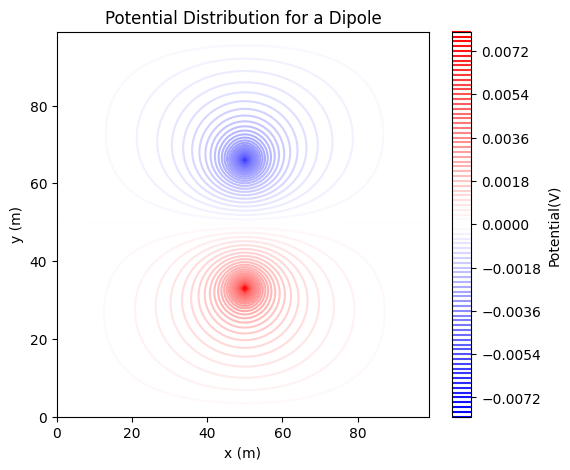

In [9]:
plt.figure(figsize=(6, 5))
plt.contour(phi, levels=100, cmap='bwr')
plt.colorbar(label='Potential(V)')
plt.title('Potential Distribution for a Dipole')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

## QUESTION 3

In [11]:
def gauss_seidel(phi, rho, omega, h=h, epsilon=1e-10,  max_iter=10000):
    for it in range(max_iter):
        phi_old = phi.copy()
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                phi[i, j] = (1 - omega) * phi[i, j] + omega * 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * rho[i, j])
        
        if np.linalg.norm(phi - phi_old) < epsilon:
            return phi, it
    return phi, max_iter

In [12]:
omega_values = np.linspace(0.5, 2.1, num=9)
iterations = []

for omega in omega_values:
    phi = np.zeros((Nx, Ny))  # Reset potential for each test
    phi, it = gauss_seidel(phi, rho, omega, epsilon=1e-5)
    iterations.append(it)

C:\Users\krito\AppData\Local\Temp\ipykernel_32688\3876917463.py:6: RuntimeWarning: overflow encountered in scalar add
  phi[i, j] = (1 - omega) * phi[i, j] + omega * 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * rho[i, j])
C:\Users\krito\AppData\Local\Temp\ipykernel_32688\3876917463.py:6: RuntimeWarning: invalid value encountered in scalar add
  phi[i, j] = (1 - omega) * phi[i, j] + omega * 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * rho[i, j])


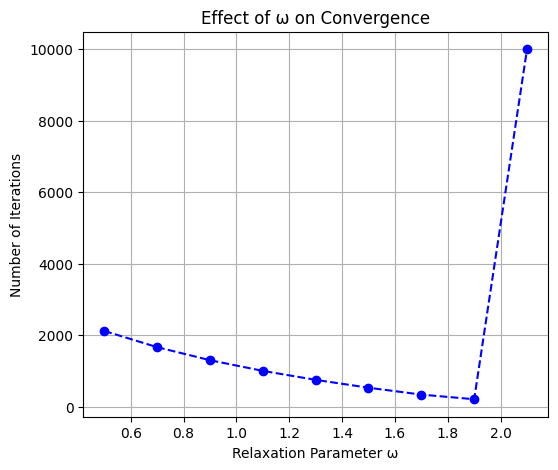

In [13]:
plt.figure(figsize=(6, 5))
plt.plot(omega_values, iterations, marker='o', linestyle='--', color='b')
plt.xlabel('Relaxation Parameter ω')
plt.ylabel('Number of Iterations')
plt.title('Effect of ω on Convergence')
plt.grid()
plt.show()

The resulting outcome aligns with our initial predictions. We observe that the potential/energy converges more rapidly for values of ω in the range 1.0 < ω < 1.9, while for ω > 2.0, convergence is not achieved.

## QUESTION 4

In [16]:
def create_charge_distribution(Nx, Ny):
    rho = np.zeros((Nx, Ny))
    dipole_pos = [(Nx//3, Ny//2), (2*Nx//3, Ny//2)]
    rho[dipole_pos[0]] = 10/h
    rho[dipole_pos[1]] = -10/h
    return rho

In [17]:
def calculate_energy(phi, rho, h):
    N, M = phi.shape
    energy = 0.0

    for i in range(1, N):
        for j in range(1, M):
            energy += 0.5 * ((phi[i, j] - phi[i-1, j])**2 + (phi[i, j] - phi[i, j-1])**2)

    energy -= h**2 * np.sum(rho[1:, 1:] * phi[1:, 1:])

    return energy

In [18]:
def gauss_seidel(phi, rho, omega, h, epsilon=1e-14, max_iter=10000):
    Nx, Ny = phi.shape

    for it in range(max_iter):
        phi_old = phi.copy()

        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                phi[i, j] = (1 - omega) * phi[i, j] + omega * 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * rho[i, j])

        if np.linalg.norm(phi - phi_old) < epsilon:
            return phi

    return phi  # Return phi even if max iterations reached

In [19]:
mesh_sizes = [10, 20, 30, 40, 50, 100, 200, 300]
energies = []

In [21]:
for N in mesh_sizes:
    h = L / (N - 1)
    phi = np.zeros((N, N))
    rho = create_charge_distribution(N, N)
    phi = gauss_seidel(phi, rho, omega=1.5, h=h, epsilon=1e-5)
    energy = calculate_energy(phi, rho, h)
    energies.append(energy)

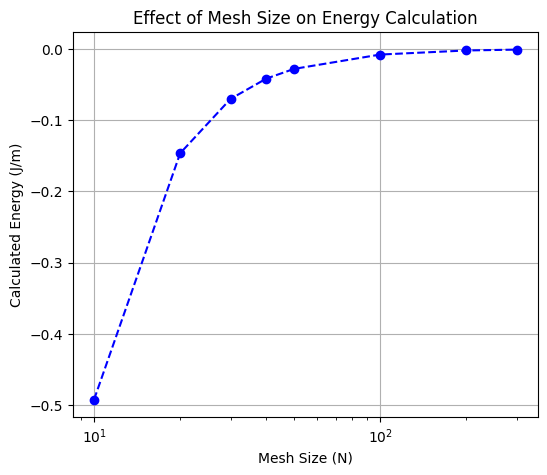

In [22]:
plt.figure(figsize=(6, 5))
plt.plot(mesh_sizes, energies, marker='o', linestyle='--', color='b')
plt.xlabel('Mesh Size (N)')
plt.ylabel('Calculated Energy (J/m)')
plt.title('Effect of Mesh Size on Energy Calculation')
plt.xscale('log')
plt.grid()
plt.show()

As the grid becomes finer (with larger N), the computed energy steadily approaches zero, indicating that the solution is converging to a more accurate value. Coarser grids often underestimate the energy (hence the more negative values), while increasing the number of elements reduces errors and yields better approximations. Thus, the mesh resolution improves the overall accuracy of the analysis.


## QUESTION 5 AND 9

In [25]:
def apply_neumann_bc(phi):
    phi[0, :] = phi[1, :]
    phi[-1, :] = phi[-2, :]
    phi[:, 0] = phi[:, 1]
    phi[:, -1] = phi[:, -2]

In [26]:
def apply_periodic_bc(phi):
    phi[0, :] = phi[-2, :]
    phi[-1, :] = phi[1, :]
    phi[:, 0] = phi[:, -2]
    phi[:, -1] = phi[:, 1]

In [27]:
def apply_dirichlet_bc(phi, value=0):
    phi[0, :] = value
    phi[-1, :] = value
    phi[:, 0] = value
    phi[:, -1] = value

In [28]:
def gauss_seidel(phi, rho, omega=1.5, bc_type='dirichlet', epsilon=1e-14, max_iter=10000, value=0):
    for it in range(max_iter):
        phi_old = phi.copy()
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                phi[i, j] = (1 - omega) * phi[i, j] + omega * 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * rho[i, j])
        
        if bc_type == 'neumann':
            apply_neumann_bc(phi)
        elif bc_type == 'periodic':
            apply_periodic_bc(phi)
        else:
            apply_dirichlet_bc(phi, value)
        
        if np.linalg.norm(phi - phi_old) < epsilon:
            break
            
    return phi

In [29]:
def create_random_charge_distribution(Nx, Ny, d=30): # Fixed dipole separation
    rho = np.zeros((Nx, Ny))

    # Randomly place one charge
    x = np.random.randint(d, Nx - d)
    y = np.random.randint(d, Ny - d)

    # dipole orientation: horizontal or vertical
    if np.random.rand() < 0.5:  # 50% chance
        x2, y2 = x + d, y
    else:
        x2, y2 = x, y + d

    rho[x, y] = 1 / h
    rho[x2, y2] = -1 / h

    return rho

In [30]:
rho = create_random_charge_distribution(Nx, Ny)
omega = 1.5

boundary_conditions = ['dirichlet', 'neumann', 'periodic']
energy_results = {}

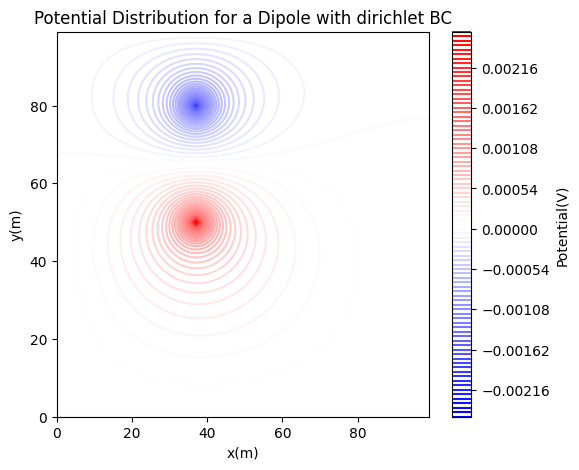

Energy with dirichlet boundary conditions: -8.52884307641477e-06 J/m


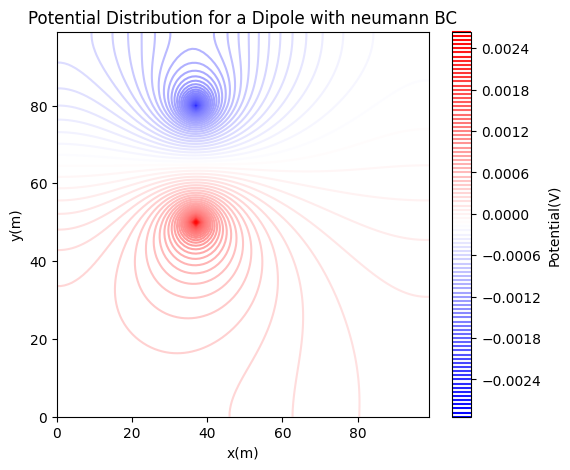

Energy with neumann boundary conditions: -9.278646742606804e-06 J/m


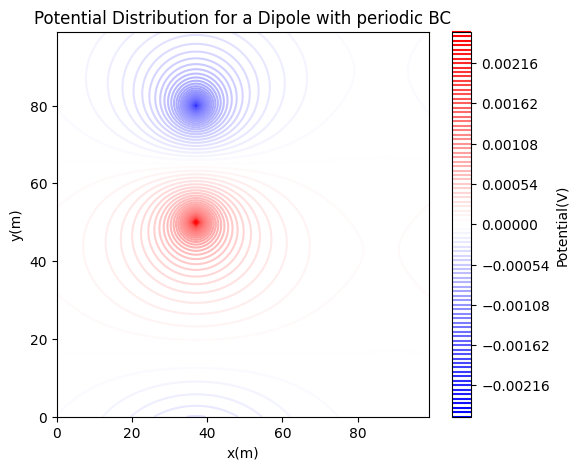

Energy with periodic boundary conditions: -8.643652978557727e-06 J/m


In [31]:
for bc in boundary_conditions:
    phi = np.zeros((Nx, Ny))  # Reset for each BC
    phi = gauss_seidel(phi, rho, omega, bc, epsilon=1e-5)
    energy = calculate_energy(phi, rho, h)
    energy_results[bc] = energy

    plt.figure(figsize=(6, 5))
    plt.contour(phi, levels=100, cmap='bwr')
    plt.colorbar(label='Potential(V)')
    plt.title(f'Potential Distribution for a Dipole with {bc} BC')
    plt.xlabel('x(m)')
    plt.ylabel('y(m)')
    plt.show()

    print(f"Energy with {bc} boundary conditions: {energy} J/m")

By changing the position of the dipole within the cell while keeping the distance between the charges fixed, we observe that the energy may vary. This is due to the fact that the boundary conditions (Dirichlet, Neumann, or periodic) influence the field,  
and thus the energy — especially when the dipole is placed near the boundaries of the cell.

To better approximate an “isolated” dipole, we could use a cell as large as possible, so that the dipole’s field "fades out" before reaching the boundaries or its periodic images, minimizing interactions with the domain edges (given the randomness imposed on the dipole's position). Alternatively, if the dipole’s position is not random, we could simply place it at the center of the cell each time, so that the boundary conditions affect it symmetrically, reducing pseudo-interactions with the edges or with the repeating potential lines (in the case of periodic boundary conditions).


## QUESTION 10

In [ ]:
L = 1.0
Nx = 100
Ny = 100
h = L / (Nx - 1)
omega = 1.5
d_sep = 30

In [35]:
def create_centered_charge_distribution(Nx, Ny, d_sep):
    rho = np.zeros((Nx, Ny))
    cx = Nx // 2
    cy = Ny // 2
    pos1 = (cx - d_sep, cy)
    pos2 = (cx + d_sep, cy)
    
    if pos1[0] < 0 or pos1[0] >= Nx or pos2[0] < 0 or pos2[0] >= Nx:
        raise ValueError("Separation exceeds grid bounds.")
    
    charge = 100 / h
    rho[pos1] = charge
    rho[pos2] = -charge
    return rho

In [36]:
rho = create_centered_charge_distribution(Nx, Ny, d_sep)

In [37]:
boundary_conditions = ['dirichlet', 'neumann', 'periodic']
energy_results = {}

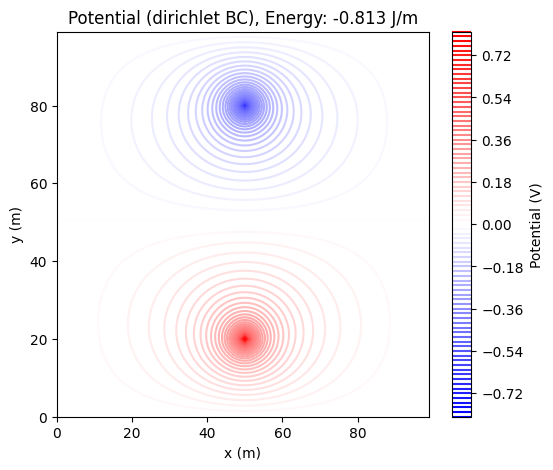

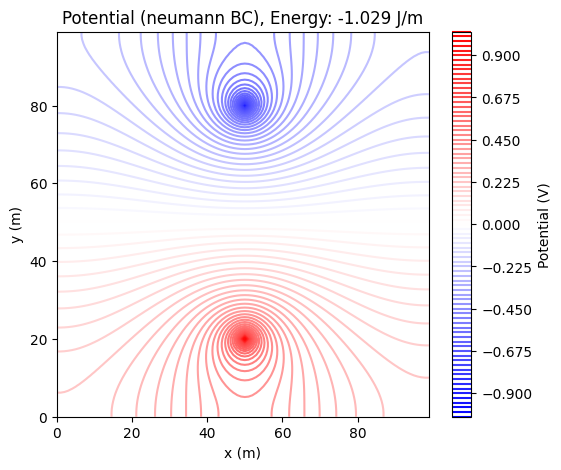

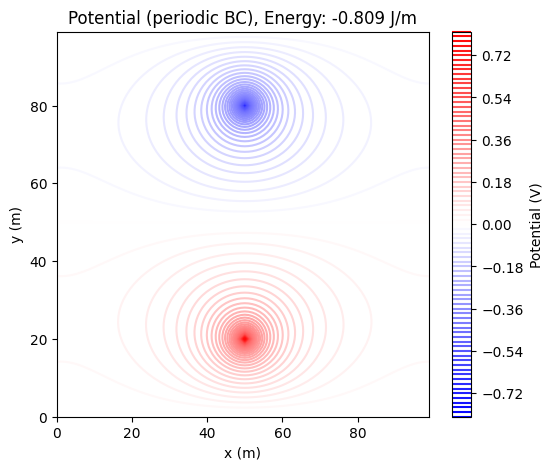

In [38]:
for bc in boundary_conditions:
    phi = np.zeros((Nx, Ny))  # Reset phi for each BC
    phi = gauss_seidel(phi, rho, omega, bc, epsilon=1e-5)
    energy = calculate_energy(phi, rho, h)
    energy_results[bc] = energy

    plt.figure(figsize=(6, 5))
    contour = plt.contour(phi, levels=100, cmap='bwr')
    plt.colorbar(contour, label='Potential (V)')
    plt.title(f'Potential ({bc} BC), Energy: {energy:.3f} J/m')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')

In [39]:
print("Results:")
for bc, energy in energy_results.items():
    print(f"{bc:>10}: {energy:.3f} J/m")

Results:
 dirichlet: -0.813 J/m
   neumann: -1.029 J/m
  periodic: -0.809 J/m


The differences observed in the potential are mainly due to the boundary conditions (BCs)   and the relative distance of the charges from the edges of the defined domain. The interaction of the charges with the boundaries of the region clearly affects the potential distribution, shaping its overall behavior, as mentioned earlier.

## QUESTION 6

In [42]:
L = 1.0
Nx, Ny = 100, 100
h = L / (Nx - 1)
omega = 1.5
d_seps = np.arange(1, 41)
energies = []

In [43]:
for d in d_seps:
    phi = np.zeros((Nx, Ny))
    rho = create_centered_charge_distribution(Nx, Ny, d_sep=d)
    
    phi = gauss_seidel(phi, rho, omega=omega, bc_type='dirichlet', epsilon=1e-5, value=0)
    
    # avoid BC artifacts
    energy = calculate_energy(phi[1:-1, 1:-1], rho[1:-1, 1:-1], h)
    energies.append(energy)

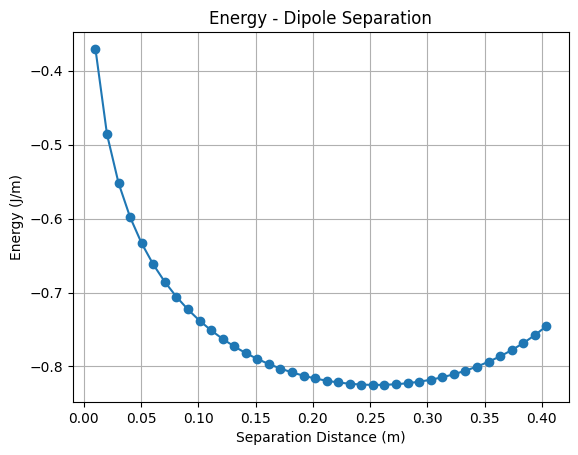

In [44]:
plt.plot(d_seps * h, energies, 'o-')
plt.xlabel('Separation Distance (m)')
plt.ylabel('Energy (J/m)')
plt.title('Energy - Dipole Separation')
plt.grid()
plt.show()

The observed energy trend becomes less negative as the dipole separation increases, which has physical significance: we observe a weakening of both the mutual attraction between the charges and their interaction with the image charges induced by the grounded boundaries. As a result, the total energy approaches zero at large separations.

## QUESTION 7

In [47]:
L = 1.0
Nx, Ny = 100, 100
h = L / (Nx - 1)
omega = 1.5

In [ ]:
d_sep = 40
rho = create_centered_charge_distribution(Nx, Ny, d_sep)

In [49]:
phi = np.zeros((Nx, Ny))

In [50]:
phi = gauss_seidel(phi, rho, omega=omega, bc_type='dirichlet', epsilon=1e-5, value=0)

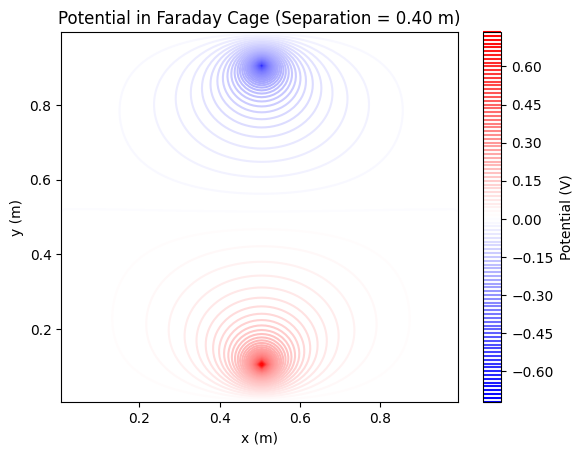

In [51]:
plt.contour(phi, cmap='bwr', levels=100, origin='lower', extent=[0, L, 0, L])
plt.colorbar(label='Potential (V)')
plt.title(f'Potential in Faraday Cage (Separation = {d_sep * h:.2f} m)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

In [52]:
energy = calculate_energy(phi[1:-1, 1:-1], rho[1:-1, 1:-1], h)
print(f"Energy: {energy} J/m")

Energy: -0.7455210625327282 J/m


## QUESTION 8

In [54]:
L = 1.0
Nx, Ny = 100, 100
h = L / (Nx - 1)
omega = 1.5

In [55]:
def capacitor_conditions(phi, V_left=1.0, V_right=-1.0):
    phi[:, 0] = V_left
    phi[:, Ny - 1] = V_right
    return phi

In [56]:
def gauss_seidel(phi, rho, omega=1.5, epsilon=1e-5, max_iter=10000):
    for _ in range(max_iter):
        phi_old = phi.copy()
        
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                phi[i, j] = (1 - omega) * phi[i, j] + omega * 0.25 * (
                    phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * rho[i, j]
                )
        
        phi = capacitor_conditions(phi)

        if np.linalg.norm(phi - phi_old) < epsilon:
            break

    return phi

In [57]:
phi = np.zeros((Nx, Ny))
rho = np.zeros((Nx, Ny))

In [58]:
phi = capacitor_conditions(phi)
phi = gauss_seidel(phi, rho, omega=omega)

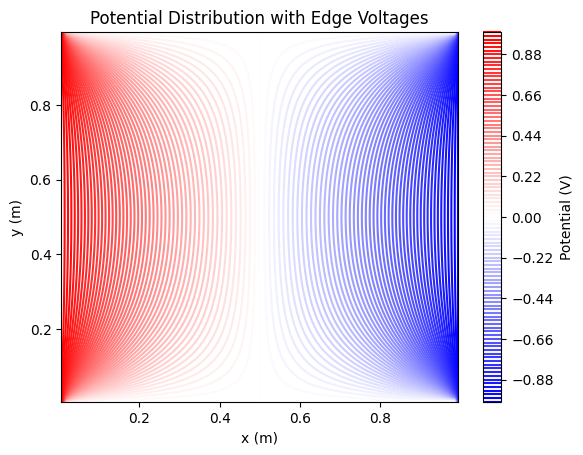

In [59]:
plt.contour(phi, cmap='bwr', levels=100, origin='lower', extent=[0, L, 0, L])
plt.colorbar(label='Potential (V)')
plt.title('Potential Distribution with Edge Voltages')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

The results obtained from the capacitor setup appear to be consistent with theory. The potential distribution reflects the behavior of an ideal capacitor, with equipotential lines being parallel and the electric field directed perpendicularly between the plates. This suggests that the method used accurately reproduces the expected physical behavior.

## QUESTION 11

In [62]:
def create_single_charge(Nx, Ny, h):
    rho = np.zeros((Nx, Ny))
    cx, cy = Nx//2, Ny//2
    rho[cx, cy] = 10 / h  # Single positive charge at center
    return rho

In [63]:
def gauss_seidel(phi, rho, omega=1.5, bc_type='dirichlet', epsilon=1e-14, max_iter=10000, value=0):
    for it in range(max_iter):
        phi_old = phi.copy()
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                phi[i, j] = (1 - omega) * phi[i, j] + omega * 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * rho[i, j])
        
        if bc_type == 'neumann':
            apply_neumann_bc(phi)
        elif bc_type == 'periodic':
            apply_periodic_bc(phi)
        else:
            apply_dirichlet_bc(phi, value)
        
        if np.linalg.norm(phi - phi_old) < epsilon:
            break
            
    return phi, it

In [64]:
rho_single = create_single_charge(Nx, Ny, h)
phi_single = np.zeros((Nx, Ny))
phi_single, iterations = gauss_seidel(phi_single, rho_single, omega, 'periodic', epsilon=1e-5)

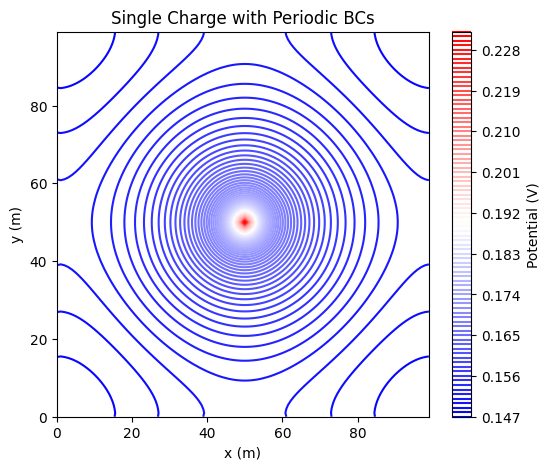

In [65]:
plt.figure(figsize=(6, 5))
plt.contour(phi_single, levels=100, cmap='bwr')
plt.colorbar(label='Potential (V)')
plt.title('Single Charge with Periodic BCs')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

In [66]:
print(iterations) #!!!!!!

9999


When solving the Poisson equation for a system that is not electrically neutral with periodic boundaries, we observe that the solution does not converge. This happens because the periodic boundary condition enforces overall neutrality, and in a non-neutral system, the total charge is nonzero, leading to failure of convergence.

In [68]:
#EOF